##drive mounting

In [192]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the Homework directory in your Google Drive
%cd /content/drive/MyDrive/APPLIED AI/progetto

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/APPLIED AI/progetto


##importing libraries

In [193]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

import tensorflow as tf
from tensorflow import keras as tfk
#import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
#from keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")
# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec
import os

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

Tensorflow version -> 2.18.0
Keras version -> 3.8.0
2.18.0


##loading data

In [194]:
data_path='dataset_lung.xlsx'
df=pd.read_excel(data_path)
df.head()

,Full_slice,Nodule,TumorClass
0,pat1_fullslice.nrrd,pat1_nodule.nrrd,5
1,pat2_fullslice.nrrd,pat2_nodule.nrrd,5
2,pat3_fullslice.nrrd,pat3_nodule.nrrd,2
3,pat4_fullslice.nrrd,pat4_nodule.nrrd,5
4,pat5_fullslice.nrrd,pat5_nodule.nrrd,4


In [195]:
patients=(df.shape[0])
patients

2363

In [196]:
!pip install pynrrd
import nrrd

In [197]:
!pip install SimpleITK
import SimpleITK as sitk

In [198]:
# Funzione per ridimensionare un'immagine
def resize_image(image, target_shape):
    sitk_image = sitk.GetImageFromArray(image)
    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing([old_dim / new_dim for old_dim, new_dim in zip(image.shape, target_shape)])
    resampler.SetSize(target_shape)
    resampler.SetInterpolator(sitk.sitkLinear)
    resized_image = sitk.GetArrayFromImage(resampler.Execute(sitk_image))
    return resized_image

In [199]:
folder_path = "Train"

target_shape=(124,124)
#images=np.zeros((2415,target_shape[0],target_shape[1]))
images=[]
titles=[]
# Itera sui file nella cartella
for file_name in os.listdir(folder_path):
    if file_name.endswith("nodule.nrrd"):  # Controlla l'estensione
        file_path = os.path.join(folder_path, file_name)
        print(f"Processing file: {file_name}")

        # Leggi il file NRRD
        data, header = nrrd.read(file_path)
        data=resize_image(data, target_shape)
        #images[int(file_name.split('_')[0].replace('pat', ''))-1]=data
        titles.append(file_name)
        images.append(data)
        # Mostra alcune informazioni
        #print(f"Dimensione dei dati: {data.shape}")
        #print(f"Header: {header}")

Processing file: pat1962_nodule.nrrd
Processing file: pat2221_nodule.nrrd
Processing file: pat2227_nodule.nrrd
Processing file: pat2012_nodule.nrrd
Processing file: pat2166_nodule.nrrd
Processing file: pat2172_nodule.nrrd
Processing file: pat2077_nodule.nrrd
Processing file: pat2226_nodule.nrrd
Processing file: pat2143_nodule.nrrd
Processing file: pat2069_nodule.nrrd
Processing file: pat2193_nodule.nrrd
Processing file: pat2026_nodule.nrrd
Processing file: pat208_nodule.nrrd
Processing file: pat2186_nodule.nrrd
Processing file: pat2095_nodule.nrrd
Processing file: pat2126_nodule.nrrd
Processing file: pat1981_nodule.nrrd
Processing file: pat2133_nodule.nrrd
Processing file: pat1958_nodule.nrrd
Processing file: pat2217_nodule.nrrd
Processing file: pat2007_nodule.nrrd
Processing file: pat2220_nodule.nrrd
Processing file: pat2249_nodule.nrrd
Processing file: pat2054_nodule.nrrd
Processing file: pat1953_nodule.nrrd
Processing file: pat441_nodule.nrrd
Processing file: pat446_nodule.nrrd
Proc

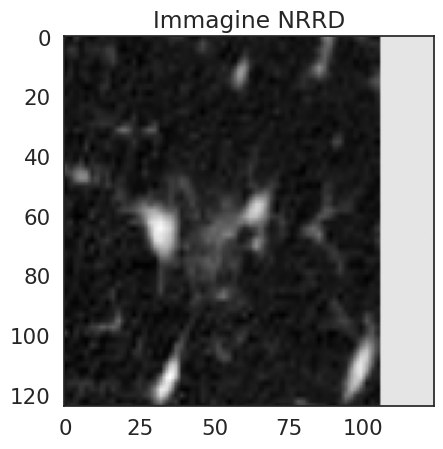

In [200]:
# Visualizza l'immagine
plt.imshow(images[0], cmap="gray")
plt.title("Immagine NRRD")
plt.show()

In [201]:
print(titles)
print()

['pat1962_nodule.nrrd', 'pat2221_nodule.nrrd', 'pat2227_nodule.nrrd', 'pat2012_nodule.nrrd', 'pat2166_nodule.nrrd', 'pat2172_nodule.nrrd', 'pat2077_nodule.nrrd', 'pat2226_nodule.nrrd', 'pat2143_nodule.nrrd', 'pat2069_nodule.nrrd', 'pat2193_nodule.nrrd', 'pat2026_nodule.nrrd', 'pat208_nodule.nrrd', 'pat2186_nodule.nrrd', 'pat2095_nodule.nrrd', 'pat2126_nodule.nrrd', 'pat1981_nodule.nrrd', 'pat2133_nodule.nrrd', 'pat1958_nodule.nrrd', 'pat2217_nodule.nrrd', 'pat2007_nodule.nrrd', 'pat2220_nodule.nrrd', 'pat2249_nodule.nrrd', 'pat2054_nodule.nrrd', 'pat1953_nodule.nrrd', 'pat441_nodule.nrrd', 'pat446_nodule.nrrd', 'pat478_nodule.nrrd', 'pat229_nodule.nrrd', 'pat287_nodule.nrrd', 'pat2349_nodule.nrrd', 'pat358_nodule.nrrd', 'pat339_nodule.nrrd', 'pat2332_nodule.nrrd', 'pat30_nodule.nrrd', 'pat481_nodule.nrrd', 'pat2363_nodule.nrrd', 'pat414_nodule.nrrd', 'pat282_nodule.nrrd', 'pat2357_nodule.nrrd', 'pat2308_nodule.nrrd', 'pat2284_nodule.nrrd', 'pat415_nodule.nrrd', 'pat2298_nodule.nrrd', '

In [202]:
df.head()

,Full_slice,Nodule,TumorClass
0,pat1_fullslice.nrrd,pat1_nodule.nrrd,5
1,pat2_fullslice.nrrd,pat2_nodule.nrrd,5
2,pat3_fullslice.nrrd,pat3_nodule.nrrd,2
3,pat4_fullslice.nrrd,pat4_nodule.nrrd,5
4,pat5_fullslice.nrrd,pat5_nodule.nrrd,4


In [203]:
ordered_titles = df['Nodule'].tolist()
title_to_image = dict(zip(titles, images))
# Riordina le immagini in base all'ordine dei titoli nel DataFrame
ordered_images = [title_to_image[title] for title in ordered_titles]


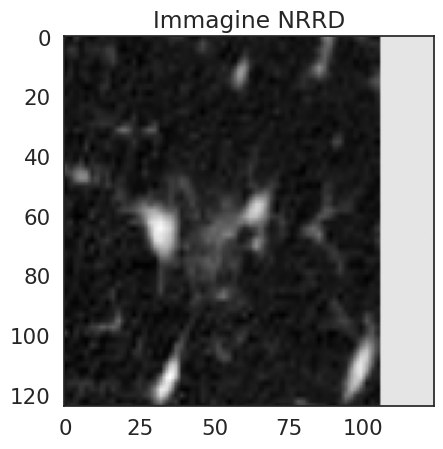

In [204]:
# Visualizza l'immagine
plt.imshow(ordered_images[1961], cmap="gray")
plt.title("Immagine NRRD")
plt.show()

In [205]:
categorical_labels=df['TumorClass'].values
print(categorical_labels)

[5 5 2 ... 5 5 5]


In [206]:
binary_labels=np.where((categorical_labels==1)|(categorical_labels==2|(categorical_labels==3)), 0, 1)
print(binary_labels)

[1 1 0 ... 1 1 1]


###visual inspection

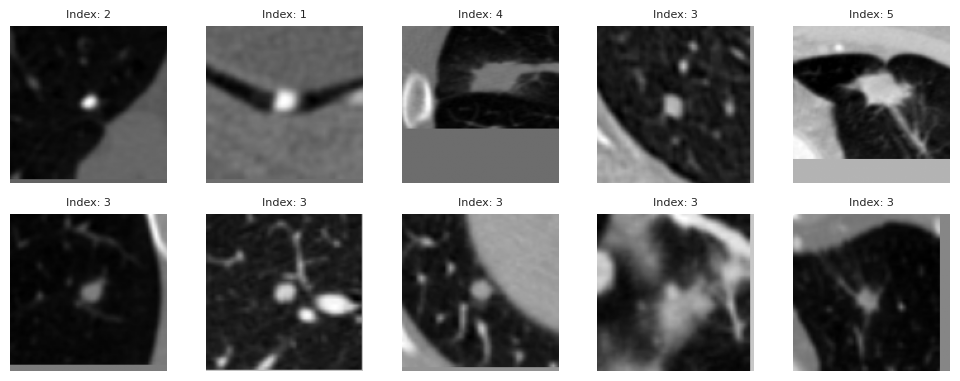

In [207]:
X=np.array(ordered_images)
y=np.array(categorical_labels)
z=np.array(binary_labels)
# Number of images to display
num_images_to_display = 10

# Generate 10 random indices from the range of available data
random_indices = np.random.choice(min(len(X), len(y)), num_images_to_display, replace=False)

# Set up a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns

for idx, i in enumerate(random_indices):
    row = idx // 5  # Determine row index (0 or 1)
    col = idx % 5   # Determine column index (0 to 4)

    axs[row, col].imshow(np.squeeze(X[i]), cmap='gray')
    axs[row, col].set_title(f'Index: {y[i]}', fontsize=8)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [208]:
print(y)
y.shape

[5 5 2 ... 5 5 5]


(2363,)

In [209]:
classes=['1','2','3','4','5']
#Check class numerosity
# Get shapes for each class in y_train
y=y-1
for class_idx, class_name in enumerate(classes):
    y_class = y[y == class_idx]
    print(f"Numerosity of {class_name} images in training set: {y_class.shape[0]}")

print("\n")

Numerosity of 1 images in training set: 244
Numerosity of 2 images in training set: 457
Numerosity of 3 images in training set: 1092
Numerosity of 4 images in training set: 418
Numerosity of 5 images in training set: 152




In [210]:
cat_classes=['Benign','Malignant']
for class_idx, class_name in enumerate(cat_classes):
    z_class = z[z == class_idx]
    print(f"Numerosity of {class_name} images in training set: {z_class.shape[0]}")

print("\n")

Numerosity of Benign images in training set: 1793
Numerosity of Malignant images in training set: 570




#Binary problem


##data processing

In [211]:
min_val = np.min(X)
max_val = np.max(X)
X= (X - min_val) / (max_val - min_val).astype('float32')
print(z)

[1 1 0 ... 1 1 1]


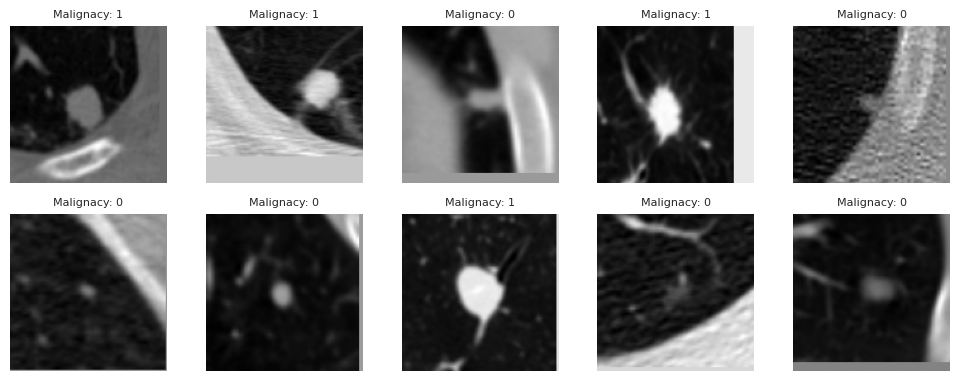

In [212]:
num_images_to_display = 10

# Generate 10 random indices from the range of available data
random_indices = np.random.choice(min(len(X), len(z)), num_images_to_display, replace=False)

# Set up a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns

for idx, i in enumerate(random_indices):
    row = idx // 5  # Determine row index (0 or 1)
    col = idx % 5   # Determine column index (0 to 4)

    axs[row, col].imshow(np.squeeze(X[i]), cmap='gray')
    axs[row, col].set_title(f'Malignacy: {z[i]}', fontsize=8)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [213]:
# Data splitting
X_train_val, X_test, z_train_val, z_test = train_test_split(X, z, random_state=seed, test_size=0.1, stratify=z)
X_train, X_val, z_train, z_val = train_test_split(X_train_val, z_train_val, random_state=seed, test_size=z_test.shape[0], stratify=z_train_val)

# Print the shapes of the resulting datasets
print("Training Data Shape:", X_train.shape)
print("Training Label Shape:", z_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Validation Label Shape:", z_val.shape)
print("Test Data Shape:", X_test.shape)
print("Test Label Shape:", z_test.shape)

Training Data Shape: (1889, 124, 124)
Training Label Shape: (1889,)
Validation Data Shape: (237, 124, 124)
Validation Label Shape: (237,)
Test Data Shape: (237, 124, 124)
Test Label Shape: (237,)


In [214]:
import gc
del X, z

gc.collect()

39989

In [215]:
#Check class numerosity
# Get shapes for each class in y_train
for class_idx, class_name in enumerate(cat_classes):
    # Filter y_train for the current class index by checking if the one-hot column is 1
    z_class_train = z_train[z_train == class_idx]
    print(f"Numerosity of {class_name} images in training set: {z_class_train.shape[0]}")

print("\n")

Numerosity of Benign images in training set: 1433
Numerosity of Malignant images in training set: 456




In [216]:
num_classes=2
print(num_classes)

2


In [217]:
from sklearn.utils.class_weight import compute_class_weight


In [218]:
class_weights = compute_class_weight('balanced', classes=np.unique(z_train), y=z_train)

# Convert to a dictionary format required by Keras
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict[0]=0.5
class_weights_dict[1]=2.5

print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5, 1: 2.5}


In [219]:
#X_train=np.expand_dims(X_train, axis=-1)
#X_val=np.expand_dims(X_val, axis=-1)
#X_test=np.expand_dims(X_test, axis=-1)
#X_train.shape

In [220]:
#X_train=np.stack([X_train] * 3, axis=-1)
#X_val=np.stack([X_val] * 3, axis=-1)
#X_test=np.stack([X_test] * 3, axis=-1)
#X_train.shape

In [221]:
def sigmoidal_contrast(image, cutoff, gain=10):
    """
    Apply sigmoidal contrast enhancement to an image.

    Parameters:
        image (numpy.ndarray): Grayscale input image.
        cutoff (float): The gray value around which contrast is adjusted (e.g., the mean value).
        gain (float): Controls the slope of the sigmoid. Higher values increase contrast.

    Returns:
        numpy.ndarray: Image with enhanced contrast.
    """

    # Apply sigmoid function
    sigmoidal_image = 1 / (1 + np.exp(-gain * (image - cutoff )))

    # Rescale to range [0, 255] and convert to uint8
    enhanced_image = (sigmoidal_image).astype(np.float32)

    return enhanced_image


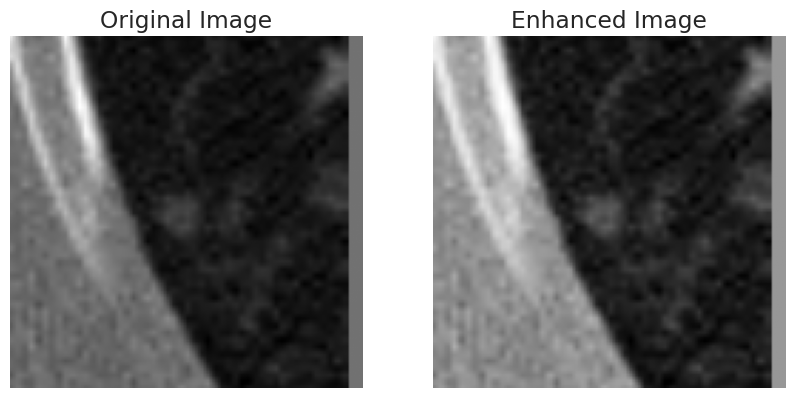

In [222]:
# Calculate the mean gray value (cutoff)
image=X_train[0]
mean_value = np.mean(image)

# Apply sigmoidal contrast enhancement
enhanced_image = sigmoidal_contrast(image, cutoff=mean_value, gain=10)

    # Display original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image, cmap="gray")
plt.axis("off")

plt.show()

In [223]:
def process_images(images, gain=10):
    """
    Apply sigmoidal contrast enhancement to a list of images.

    Parameters:
        images (list of numpy.ndarray): List of grayscale images.
        gain (float): Controls the slope of the sigmoid. Higher values increase contrast.

    Returns:
        list of numpy.ndarray: List of enhanced images.
    """
    enhanced_images = []
    for image in images:
        if image is None:
            print("Warning: Found a None image. Skipping.")
            continue

        # Calculate the mean gray value (cutoff)
        mean_value = np.mean(image)

        # Apply sigmoidal contrast enhancement
        enhanced_image = sigmoidal_contrast(image, cutoff=mean_value, gain=gain)
        enhanced_images.append(enhanced_image)

    return enhanced_images

In [224]:
def process_images_in_batches(images, batch_size, gain=10):
    """
    Apply sigmoidal contrast enhancement to images in batches.

    Parameters:
        images (list of numpy.ndarray): List of grayscale images.
        batch_size (int): Number of images to process in each batch.
        gain (float): Controls the slope of the sigmoid. Higher values increase contrast.

    Returns:
        list of numpy.ndarray: List of enhanced images.
    """
    enhanced_images = []
    for i in tqdm(range(0, len(images), batch_size)):
        batch = images[i:i + batch_size]
        for image in batch:
            if image is None:
                print("Warning: Found a None image. Skipping.")
                continue

            # Calculate the mean gray value (cutoff)
            mean_value = np.mean(image)

            # Apply sigmoidal contrast enhancement
            enhanced_image = sigmoidal_contrast(image, cutoff=mean_value, gain=gain)
            enhanced_images.append(enhanced_image)

    return enhanced_images


In [225]:
from tqdm import tqdm

In [226]:
# Process images in batches
X_train = process_images_in_batches(X_train, batch_size=32, gain=10)


100%|██████████| 60/60 [00:00<00:00, 304.12it/s]


In [227]:
X_train=np.array(X_train)

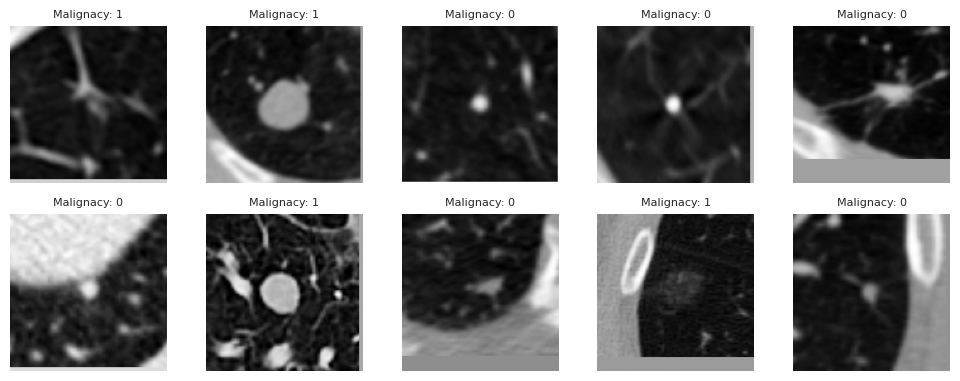

In [228]:
num_images_to_display = 10

# Generate 10 random indices from the range of available data
random_indices = np.random.choice(min(len(X_train), len(z_train)), num_images_to_display, replace=False)

# Set up a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns

for idx, i in enumerate(random_indices):
    row = idx // 5  # Determine row index (0 or 1)
    col = idx % 5   # Determine column index (0 to 4)

    axs[row, col].imshow((X_train[i]),cmap='gray')
    axs[row, col].set_title(f'Malignacy: {z_train[i]}', fontsize=8)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

##building the model

In [229]:
# Input shape for the model
# Assuming X_train is your grayscale image data
X_train = np.stack([X_train] * 3, axis=-1)  # Replicate grayscale channel 3 times
X_val = np.stack([X_val] * 3, axis=-1)  # Replicate grayscale channel 3 times
X_test = np.stack([X_test] * 3, axis=-1)  # Replicate grayscale channel 3 times
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = 1

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (124, 124, 3)
Output Shape: 1


## Augmentation Upsampling

In [230]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import random

# Calculate the target count based on the most numerous class in `y_train`
unique, counts = np.unique(z_train, return_counts=True)
class_counts = dict(zip(unique, counts))
#target_count = max(class_counts.values())
target_counts = {label: count * 2 for label, count in class_counts.items()}  # Double each class count

# Initialize the data generator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Prepare lists to store the augmented images and labels
augmented_images = []
augmented_labels = []


# Augment each class to double its original size
for class_label, original_count in class_counts.items():
    indices = np.where(z_train == class_label)[0]
    X_train_class = X_train[indices]

    # Number of augmentations needed to double the class size
    #num_augmentations = original_count
    num_augmentations = 500
    i = 0
    while i < num_augmentations:
        img = random.choice(X_train_class)
        x = img.reshape((1,) + img.shape)  # Add batch dimension

        for batch in datagen.flow(x, batch_size=1):
            augmented_images.append(batch[0])  # Store augmented image
            augmented_labels.append(class_label)  # Store label
            i += 1
            break  # Generate only one image per loop iteration

# Convert augmented data to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels).astype(np.uint8)  # Ensure integer labels


# Append the augmented images and labels back to `X_train` and `y_train`
X_train_balanced = np.concatenate((X_train, augmented_images), axis=0)
z_train_balanced = np.concatenate((z_train, augmented_labels), axis=0)

# Verify the new class counts in `y_train_balanced`
unique_balanced, counts_balanced = np.unique(z_train_balanced, return_counts=True)
class_counts_balanced = dict(zip(unique_balanced, counts_balanced))

# Print the final shape and counts of each class in `X_train_balanced`
#print("Class counts before balancing:")
#for class_label, count in class_counts.items():
#    print(f"Class {class_label}: {count}")
#print("\nFinal shapes:")
#print(f"X_train shape: {X_train.shape}")
#print(f"z_train shape: {z_train.shape}")

# Print the final shape and counts of each class in `X_train_balanced`
print("Class counts after balancing:")
for class_label, count in class_counts_balanced.items():
    print(f"Class {class_label}: {count}")
print("\nFinal shapes:")
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"z_train_balanced shape: {z_train_balanced.shape}")

X_train=np.array(X_train_balanced)
z_train=np.array(z_train_balanced)

Class counts after balancing:
Class 0: 1933
Class 1: 956

Final shapes:
X_train_balanced shape: (2889, 124, 124, 3)
z_train_balanced shape: (2889,)


In [231]:
!pip install keras_cv

In [232]:
import keras_cv
from tensorflow.keras.layers import CenterCrop, RandomRotation, RandomTranslation, RandomFlip, RandomZoom, RandomCrop, Resizing, RandomContrast,RandomBrightness, RandomShear

# Define your geometric augmentation layers
augmentation_layers = tf.keras.Sequential([
    CenterCrop(height=96, width=96),
    RandomRotation(0.3),  # Rotate by up to 20%
    RandomTranslation(0.2, 0.2),  # Translate by up to 10% of image height/width
    RandomFlip("horizontal_and_vertical"),  # Flip both horizontally and vertically
    #RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    #RandomCrop(96,96),
    Resizing(input_shape[0], input_shape[1])

])



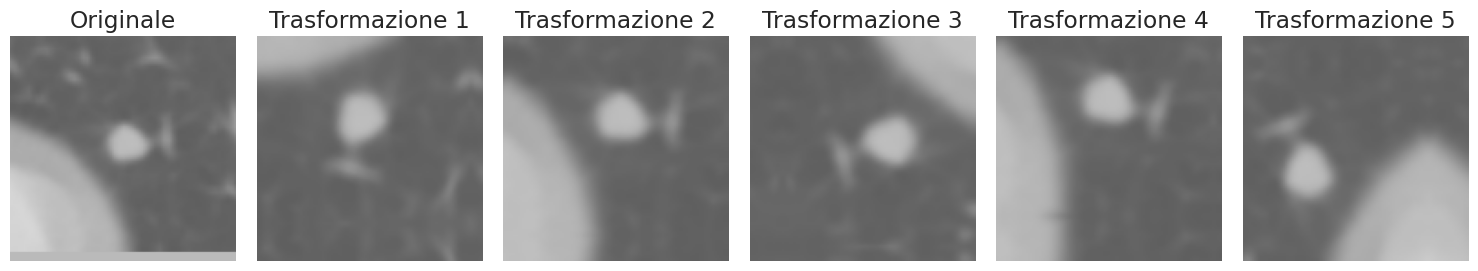

In [233]:
#image=X_train[:5]*255
image=X_train[100]*255
#print(image.shape)

augmented_images = []
for _ in range(5):  # Genera 5 trasformazioni per visualizzare la variazione
    augmented_image = augmentation_layers(image, training=True)
    augmented_images.append(augmented_image.numpy())  # Aggiungi la trasformazione alla lista

#print(np.array(augmented_images).shape)

# Visualizza le immagini
plt.figure(figsize=(15, 5))

# Mostra l'immagine originale
plt.subplot(1, 6, 1)
plt.imshow(image.astype(np.uint8),cmap='gray')
plt.title("Originale")
plt.axis('off')

# Mostra le immagini trasformate
for i, aug_img in enumerate(augmented_images):
    plt.subplot(1, 6, i + 2)
    plt.imshow(aug_img.astype(np.uint8),cmap='gray')
    plt.title(f"Trasformazione {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [234]:
del augmentation_layers

gc.collect()

31266

In [235]:
import tensorflow as tf
import keras_cv


crop_image=tf.keras.Sequential([
      CenterCrop(height=96, width=96),
      Resizing(input_shape[0], input_shape[1])
])


augmentation_layers = tf.keras.Sequential([
    #CenterCrop(height=96, width=96),
    RandomRotation(0.45, fill_mode='nearest'),  # Rotate by up to 20%
    RandomTranslation(0.3, 0.3, fill_mode='nearest'),  # Translate by up to 10% of image height/width
    RandomFlip("horizontal_and_vertical"),  # Flip both horizontally and vertically
    #RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode='nearest'),
    RandomBrightness(0.2, value_range=(0, 255)),
    RandomContrast(0.25, value_range=(0, 255)),
    RandomShear(0.2, 0.2, fill_mode='nearest'),
    #RandomCrop(96, 96),
    #Resizing(input_shape[0], input_shape[1])

])


# Creazione dei dataset
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((X_train*255, z_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val*255, z_val))
test_ds=tf.data.Dataset.from_tensor_slices((X_test*255, z_test))


train_ds = train_ds.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)
test_ds=test_ds.batch(batch_size)

def apply_crop(images, labels):
    images = crop_image(images)
    return images, labels

# Funzione per applicare RandAugment
def apply_augmentation(images, labels):
    images = augmentation_layers(images)  # Applica RandAugment solo alle immagini
    return images, labels

def apply_contrast(images, labels):
    images = ((process_images((images/255), gain=10))*255)
    return images, labels

# Applica RandAugment al dataset di addestramento
train_ds = train_ds.map(apply_crop, num_parallel_calls=tf.data.AUTOTUNE)
train_ds=train_ds.map(apply_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(apply_crop, num_parallel_calls=tf.data.AUTOTUNE)
test_ds=test_ds.map(apply_crop, num_parallel_calls=tf.data.AUTOTUNE)
#train_ds = train_ds.map(apply_contrast, num_parallel_calls=tf.data.AUTOTUNE)

# Funzione di preprocessing per normalizzare le immagini
def preprocess_for_model(images, labels):
    images = tf.cast(images, tf.float32)
    labels=tf.cast(labels, tf.float32)
    return images, labels

# Preprocessing sui dataset
train_ds = train_ds.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)
test_ds=test_ds.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)

# Ottimizzazioni
train_ds = train_ds.cache()  # Cache in memoria
train_ds = train_ds.shuffle(buffer_size=1000)  # Mescola il dataset
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)  # Precarica i batch
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


###base model

In [236]:
from keras.applications import EfficientNetB2
import keras_cv

efficient=EfficientNetB2(include_top=False, weights='imagenet',  pooling='avg', input_shape=input_shape)
efficient.trainable=False # Freeze all layers for initial transfer learning


In [237]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers as tfko # Import optimizers from tensorflow.keras.optimizers

inputs = layers.Input(shape=input_shape, name='input')


x = efficient(inputs)

# Add GlobalAveragePooling and Dropout
#x = tfkl.GlobalAveragePooling2D(name='gap')(x) #already included
#x = tfkl.Dropout(0.3, name='dropout')(x)
x=tfkl.Dense(64, activation='relu', name='dense')(x)
x = tfkl.Dropout(0.3, name='dropout')(x)

# Add a final Dense layer for classification
outputs = tfkl.Dense(1, activation='sigmoid', name='output')(x)

# Create the model
model = tfk.Model(inputs=inputs, outputs=outputs, name='model')
model = models.Model(inputs, outputs)

# Compile the model with categorical cross-entropy loss and Adam optimiser
model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfko.AdamW(learning_rate=1e-3, weight_decay=1e-3), metrics=['accuracy'])

#Display model summary
model.summary(expand_nested=True)


# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [238]:
# Train the model

history = model.fit(
    train_ds,
    epochs=1000,
    class_weight=class_weights_dict,
    validation_data=validation_dataset,
    callbacks=[tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=50, restore_best_weights=True)]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'tumor_classes_prova1.keras'
model.save(model_filename)
print(f"Model saved as {model_filename} in /content/drive/MyDrive/APPLIED AI/progetto")

# Free memory by deleting the model instance
del model

Epoch 1/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 58s 307ms/step - accuracy: 0.4459 - loss: 0.6706 - val_accuracy: 0.4726 - val_loss: 0.8158
Epoch 2/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5099 - loss: 0.5736 - val_accuracy: 0.5232 - val_loss: 0.7865
Epoch 3/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5538 - loss: 0.5493 - val_accuracy: 0.5401 - val_loss: 0.7386
Epoch 4/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5842 - loss: 0.5137 - val_accuracy: 0.6878 - val_loss: 0.5749
Epoch 5/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6616 - loss: 0.4962 - val_accuracy: 0.6962 - val_loss: 0.5509
Epoch 6/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6971 - loss: 0.4633 - val_accuracy: 0.7468 - val_loss: 0.5088
Epoch 7/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7299 - loss: 0.4279 - val_accuracy: 0.6878 - val_loss: 0.5848
Epoch 8/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7191 - loss: 0.4055 - val_ac

###fine tuning

In [239]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('tumor_classes_prova1.keras')

#Display summary
model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [240]:
# Set all layers in efficientnetb0 as trainable
model.get_layer('efficientnetb2').trainable = True

# Set all layers as non-trainable
for layer in model.get_layer('efficientnetb2').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(model.get_layer('efficientnetb2').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
       # print(i, layer.name, type(layer).__name__, layer.trainable)

# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(model.get_layer('efficientnetb2').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(model.get_layer('efficientnetb2').layers):
    print(i, layer.name, layer.trainable)


model.summary(expand_nested=True)


# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

##training

In [241]:
# Define the patience value for early stopping
patience = 25

# Create an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True,
)

# Store the callback in a list
callbacks = [early_stopping]

In [242]:
# Compile the model
model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfko.AdamW(learning_rate=1e-4, weight_decay=1e-3), metrics=['accuracy'])

# Display a summary of the model architecture
model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [243]:
history = model.fit(
    train_ds,
    class_weight=class_weights_dict,
    validation_data=validation_dataset,
    epochs=1000,
    callbacks=callbacks
).history


# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Format the filename to avoid special character issues
# Replace decimal point in accuracy with underscore, or convert to an integer
formatted_accuracy = str(final_val_accuracy).replace('.', '_')
model_filename = 'efiicientnet_prova1_1.keras'

# Save model to the Homework directory
model.save(model_filename)
print(f"Model saved as {model_filename} in /content/drive/MyDrive/APPLIED AI/progetto")

Epoch 1/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 89s 429ms/step - accuracy: 0.8537 - loss: 0.3155 - val_accuracy: 0.7679 - val_loss: 0.6572
Epoch 2/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8984 - loss: 0.2354 - val_accuracy: 0.7468 - val_loss: 0.6749
Epoch 3/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9129 - loss: 0.1965 - val_accuracy: 0.6160 - val_loss: 0.8617
Epoch 4/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9342 - loss: 0.1401 - val_accuracy: 0.6203 - val_loss: 0.8872
Epoch 5/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9599 - loss: 0.0869 - val_accuracy: 0.7384 - val_loss: 0.7763
Epoch 6/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9511 - loss: 0.0910 - val_accuracy: 0.7089 - val_loss: 0.7377
Epoch 7/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9586 - loss: 0.0983 - val_accuracy: 0.7046 - val_loss: 0.8319
Epoch 8/1000
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9691 - loss: 0.0711 - val_ac

##make inference

In [244]:
# Load the saved model
model = tfk.models.load_model('efiicientnet_prova1_1.keras')
#model = tfk.models.load_model('tumor_classes_prova1.keras')
# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [245]:
# Predict labels for the entire test set
#predictions = model.predict(X_test*255, verbose=0)
predictions=(model.predict(test_ds) > 0.5).astype("int32")
# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Predictions Shape: (237, 1)


In [246]:
labels = ['Benign','Malignant']

Accuracy score over the test set: 0.789
Precision score over the test set: 0.7943
Recall score over the test set: 0.789
F1 score over the test set: 0.7914


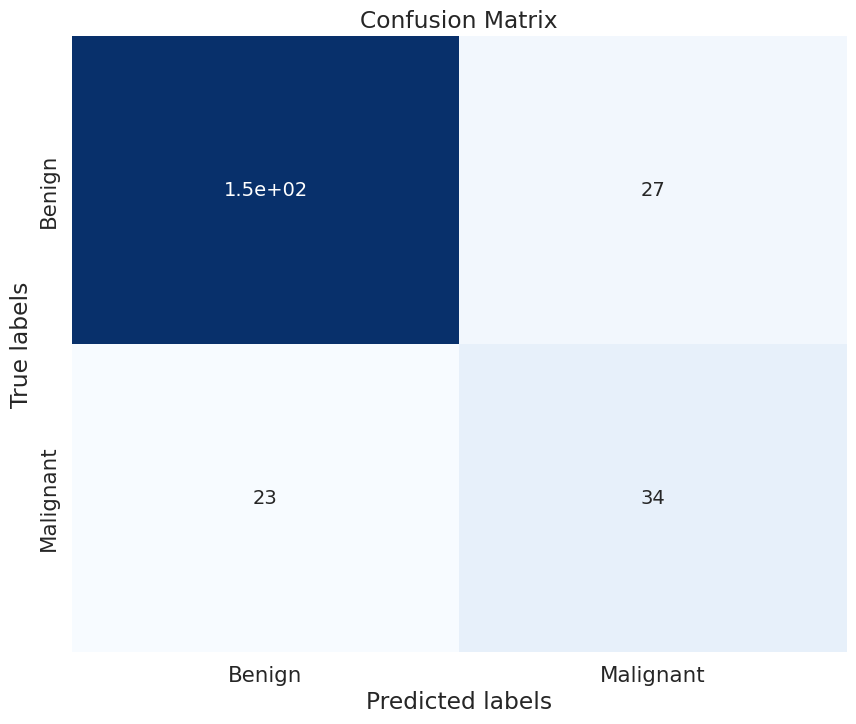

In [247]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions and ground truth to class labels
pred_classes = predictions
true_classes = z_test

# Calculate and display metrics
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, average='weighted')
recall = recall_score(true_classes, pred_classes, average='weighted')
f1 = f1_score(true_classes, pred_classes, average='weighted')

print(f'Accuracy score over the test set: {round(accuracy, 4)}')
print(f'Precision score over the test set: {round(precision, 4)}')
print(f'Recall score over the test set: {round(recall, 4)}')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Define class labels (e.g., ['Class 0', 'Class 1', ...])
class_labels = labels  # Replace `labels` with your list of actual class names

# Plot the confusion matrix with class labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', cbar=False)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
false_negatives_indexes = np.where((z_test == 1) & (np.squeeze(predictions) == 0))[0]

In [ ]:
print(f'Number of false negatives: {len(false_negatives_indexes)}')


Number of false negatives: 22


In [ ]:
print(z_test)

[0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]


In [ ]:
print(np.squeeze(predictions))

[0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0]


In [ ]:
print(false_negatives_indexes)

[ 23  42  43  51  54  55  59  61  64  74 102 115 117 119 121 122 139 147
 171 197 211 218]


1
[0]


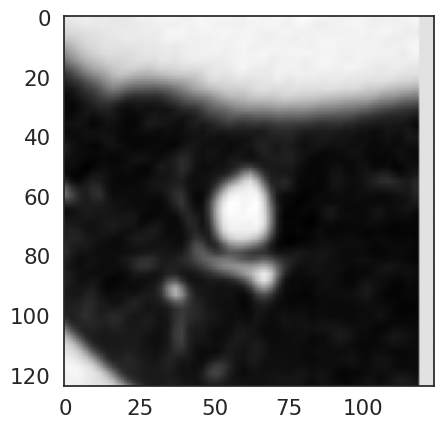

In [ ]:
print(z_test[23])
print(predictions[23])
image=X_test[23]

plt.imshow(image[:,:,0], cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
#@title Implementation
import cv2

def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model


    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
			inputs=[model.inputs],
			outputs=[model.get_layer('efficientnetb2').get_layer(layer_name).output,
				model.output])

    with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32) #we use the preprocessed image
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]
		# use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)

    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    # compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    # grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    # heatmap = (heatmap * 255).astype("uint8")
		# return the resulting heatmap to the calling function
    return heatmap,predictions


In [ ]:
#@title Implementation
import cv2

def GradCam(gradModel, img_array, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model


    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = gradModel

    with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32) #we use the preprocessed image
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]
		# use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)

    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    # compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    # grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    # heatmap = (heatmap * 255).astype("uint8")
		# return the resulting heatmap to the calling function
    return heatmap,predictions


In [ ]:

gradcam_model = Model(
    inputs=model.input,
    outputs=[
        model.get_layer("efficientnetb2").get_layer("block7b_expand_bn").output,
        model.output  # Final output
    ]
)

In [ ]:

image=np.expand_dims(X_test[23], axis=0)


In [ ]:
grad_cam,predictions=GradCam(gradcam_model,image)

KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m133874168980368\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 124, 124, 3), dtype=float32)\n  • training=None\n  • mask=None'

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
def preprocess_image(img, target_size=(224, 224)):
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

img=X_test[23]
image = preprocess_image(img)

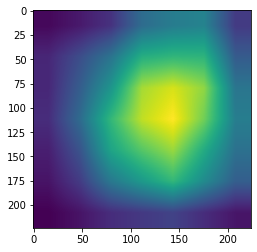

In [ ]:
plt.imshow(grad_cam)

In [ ]:
predictions[:,1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.941885e-05], dtype=float32)>

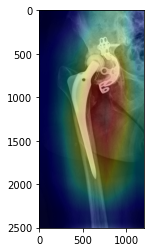

In [ ]:
def sigmoid(x, a, b, c):
  return c / (1 + np.exp(-a * (x-b)))
def display_gradcam(img_path, heatmap):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))

    #heatmap = sigmoid(heatmap, 50, thresh, 1)

    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    plt.imshow(superimposed_img)

display_gradcam(img_test[img_index], grad_cam)


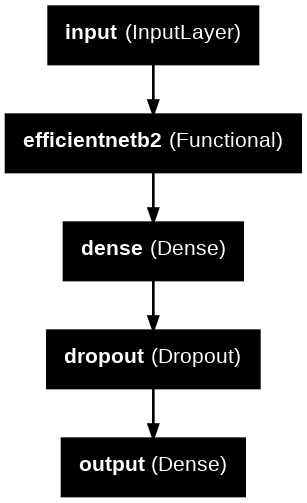

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)